In [0]:
import pandas as pd
import numpy as np
from google.colab import files

In [0]:
uploaded = files.upload()

Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv


In [0]:
data=pd.read_csv("pima-indians-diabetes.csv")

In [0]:
data

In [0]:
data.columns=['preg','glu','BP','ST','Ins','BMI','Diab','Age','Class'] 

In [0]:
type(data)

pandas.core.frame.DataFrame

In [0]:
data.shape

(767, 9)

In [0]:
data.tail()

,preg,glu,BP,ST,Ins,BMI,Diab,Age,Class
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1
766,1,93,70,31,0,30.4,0.315,23,0


In [0]:
X=data[['preg','glu','BP','ST','Ins','BMI','Diab','Age']]
Y=data['Class']

In [0]:
Y.head()

0    0
1    1
2    0
3    1
4    0
Name: Class, dtype: int64

In [0]:
Y.value_counts()

0    500
1    267
Name: Class, dtype: int64

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [0]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=.3,random_state=4, stratify=Y);

In [0]:
ytest.shape

(231,)

In [0]:
ytrain.value_counts()

0    349
1    187
Name: Class, dtype: int64

In [0]:
187/536

0.34888059701492535

In [0]:
# Z Score Standardization
S=StandardScaler()
S.fit(data)
xtrain=S.fit_transform(xtrain)
xtest=S.fit_transform(xtest)

MLP Definition

In [0]:
model=MLPClassifier(hidden_layer_sizes=(12,12,12,12,12),activation='tanh',solver='adam',batch_size=4,max_iter=500, verbose=True)# MLP model definition

In [0]:
model

MLPClassifier(activation='sigmoid', alpha=0.0001, batch_size=4, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(12, 12, 12, 12, 12), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [0]:
model.fit(xtrain,ytrain)# fitting the model to our data

Iteration 1, loss = 0.64491884
Iteration 2, loss = 0.62449326
Iteration 3, loss = 0.62295101
Iteration 4, loss = 0.61621053
Iteration 5, loss = 0.61724782
Iteration 6, loss = 0.62400933
Iteration 7, loss = 0.61880528
Iteration 8, loss = 0.60876227
Iteration 9, loss = 0.58853204
Iteration 10, loss = 0.60063674
Iteration 11, loss = 0.59401976
Iteration 12, loss = 0.59098257
Iteration 13, loss = 0.58807702
Iteration 14, loss = 0.59125685
Iteration 15, loss = 0.58653771
Iteration 16, loss = 0.58537966
Iteration 17, loss = 0.59364310
Iteration 18, loss = 0.58543926
Iteration 19, loss = 0.58253179
Iteration 20, loss = 0.58890239
Iteration 21, loss = 0.58017139
Iteration 22, loss = 0.57778283
Iteration 23, loss = 0.57818130
Iteration 24, loss = 0.57184936
Iteration 25, loss = 0.57488563
Iteration 26, loss = 0.58349328
Iteration 27, loss = 0.58554932
Iteration 28, loss = 0.57608872
Iteration 29, loss = 0.58330925
Iteration 30, loss = 0.57122639
Iteration 31, loss = 0.56487479
Iteration 32, los

MLPClassifier(activation='tanh', alpha=0.0001, batch_size=4, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(12, 12, 12, 12, 12), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [0]:
y_predict=model.predict(xtest)
y_predict

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0])

In [0]:
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
acc=metrics.accuracy_score(ytest,y_predict)# accuracy calculation
print(acc)

0.6277056277056277


In [0]:
cm=metrics.confusion_matrix(ytest,y_predict)
print(cm)

[[97 54]
 [32 48]]


In [0]:
sensitivity=cm[1,1]/(cm[1,0]+cm[1,1])
sensitivity

0.0125

0.6211920529801325


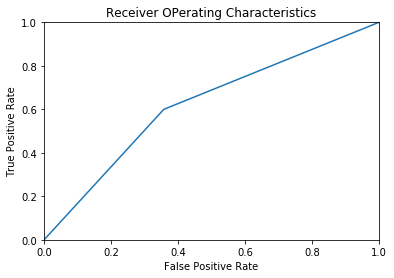

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
# ROC Plotting
fpr,tpr, _=roc_curve(ytest,y_predict)
roc_auc=auc(fpr, tpr)
print(roc_auc)
#plt.figure()
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver OPerating Characteristics')
plt.show()